# Part 1. EDA & Visualization

### 1. IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from scipy import stats

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


### 2. DATA LOADING

In [ ]:
print("\n" + "="*80)
print("LOADING DATASETS")
print("="*80)

# Load all datasets
booknow_theaters = pd.read_csv('booknow_theaters.csv')
cinepos_theaters = pd.read_csv('cinePOS_theaters.csv')
booknow_booking = pd.read_csv('booknow_booking.csv')
cinepos_booking = pd.read_csv('cinePOS_booking.csv')
booknow_visits = pd.read_csv('booknow_visits.csv')
date_info = pd.read_csv('date_info.csv')
theater_relation = pd.read_csv('movie_theater_id_relation.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Display dataset shapes
datasets = {
    'BookNow Theaters': booknow_theaters,
    'CinePOS Theaters': cinepos_theaters,
    'BookNow Bookings': booknow_booking,
    'CinePOS Bookings': cinepos_booking,
    'Daily Visits (Target)': booknow_visits,
    'Date Info': date_info,
    'Theater Relation': theater_relation,
    'Sample Submission': sample_submission
}

print("\nDataset Overview:")
print("-" * 80)
for name, df in datasets.items():
    print(f"{name:.<30} {df.shape[0]:>8,} rows × {df.shape[1]:>2} columns")

print("\n✓ All datasets loaded successfully")


LOADING DATASETS

Dataset Overview:
--------------------------------------------------------------------------------
BookNow Theaters..............      829 rows ×  5 columns
CinePOS Theaters..............    4,690 rows ×  5 columns
BookNow Bookings..............   68,336 rows ×  4 columns
CinePOS Bookings.............. 1,641,966 rows ×  4 columns
Daily Visits (Target).........  214,046 rows ×  3 columns
Date Info.....................      547 rows ×  2 columns
Theater Relation..............      150 rows ×  2 columns
Sample Submission.............   38,062 rows ×  2 columns

✓ All datasets loaded successfully


### 3. EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# Basic Statistics
print("\n[1] TARGET VARIABLE ANALYSIS")
print("-" * 80)
print(booknow_visits['audience_count'].describe())

# Missing Values Analysis
print("\n[2] MISSING VALUES ANALYSIS")
print("-" * 80)
for name, df in datasets.items():
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"\n{name}:")
        print(missing[missing > 0])
    else:
        print(f"\n{name}: No missing values ✓")


EXPLORATORY DATA ANALYSIS

[1] TARGET VARIABLE ANALYSIS
--------------------------------------------------------------------------------
count    214046.000000
mean         41.616568
std          32.834918
min           2.000000
25%          18.000000
50%          34.000000
75%          58.000000
max        1350.000000
Name: audience_count, dtype: float64

[2] MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------

BookNow Theaters:
book_theater_id    515
dtype: int64

CinePOS Theaters:
latitude     3861
longitude    3861
dtype: int64

BookNow Bookings: No missing values ✓

CinePOS Bookings: No missing values ✓

Daily Visits (Target): No missing values ✓

Date Info: No missing values ✓

Theater Relation: No missing values ✓

Sample Submission: No missing values ✓



[3] Creating Visualization 1: Target Distribution...


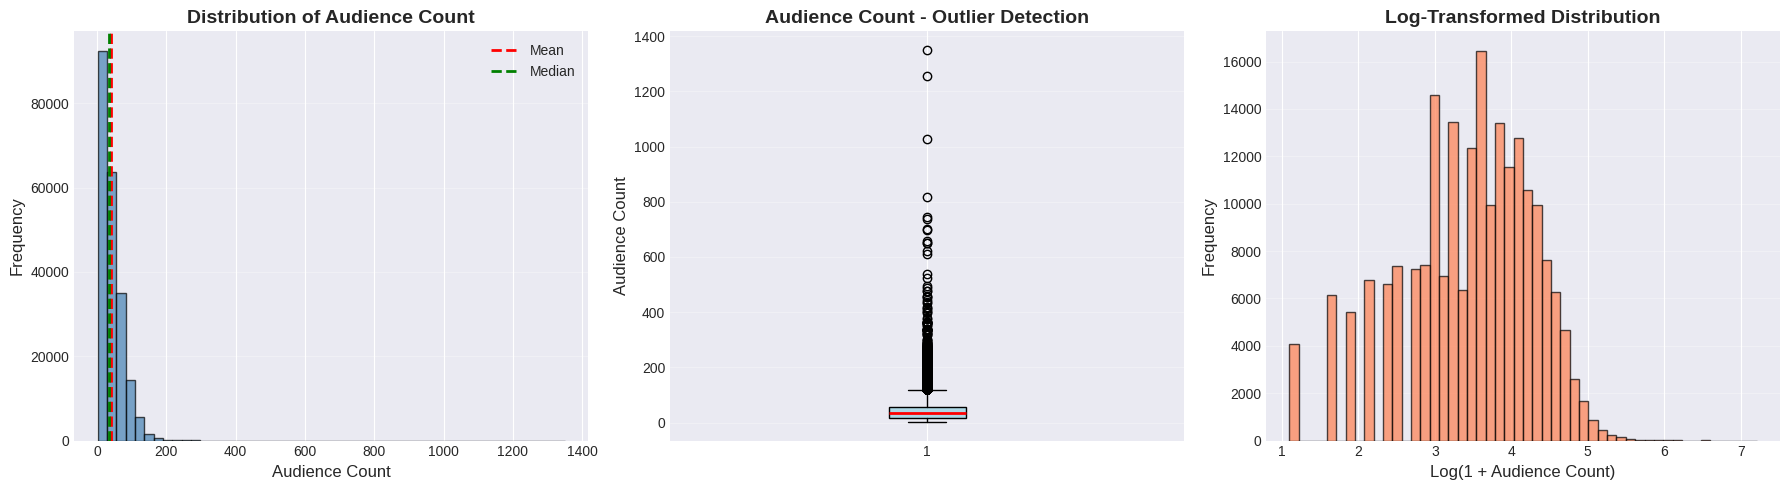

✓ Visualization 1 saved: target_distribution.png
   Key Insight: Audience count is right-skewed (mean=41.6, median=34.0)


In [ ]:
# ============================================================================
# VISUALIZATION 1: Target Distribution
# ============================================================================
print("\n[3] Creating Visualization 1: Target Distribution...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(booknow_visits['audience_count'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(booknow_visits['audience_count'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(booknow_visits['audience_count'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0].set_xlabel('Audience Count', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Audience Count', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(booknow_visits['audience_count'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Audience Count', fontsize=12)
axes[1].set_title('Audience Count - Outlier Detection', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Log-transformed distribution
axes[2].hist(np.log1p(booknow_visits['audience_count']), bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Log(1 + Audience Count)', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_title('Log-Transformed Distribution', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 1 saved: target_distribution.png")
print(f"   Key Insight: Audience count is right-skewed (mean={booknow_visits['audience_count'].mean():.1f}, median={booknow_visits['audience_count'].median():.1f})")


[4] Creating Visualization 2: Theater Types...


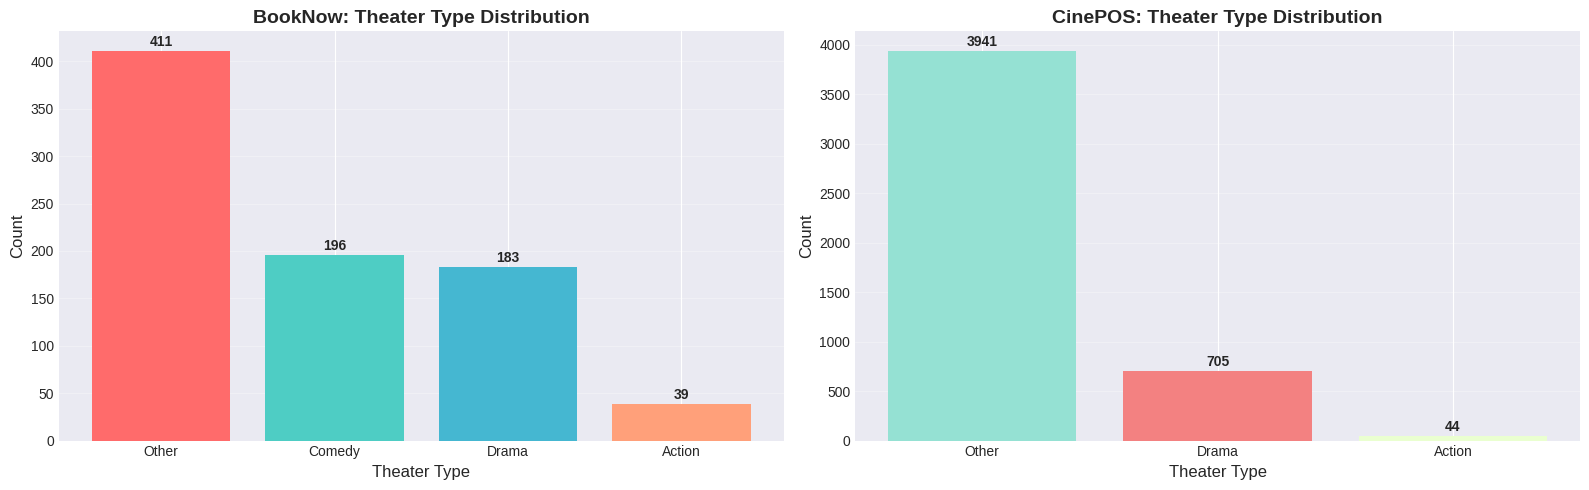

✓ Visualization 2 saved: theater_types.png


In [ ]:
# ============================================================================
# VISUALIZATION 2: Theater Type Analysis
# ============================================================================
print("\n[4] Creating Visualization 2: Theater Types...")

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# BookNow theater types
booknow_type_counts = booknow_theaters['theater_type'].value_counts()
axes[0].bar(booknow_type_counts.index, booknow_type_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[0].set_xlabel('Theater Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('BookNow: Theater Type Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(booknow_type_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# CinePOS theater types
cinepos_type_counts = cinepos_theaters['theater_type'].value_counts()
axes[1].bar(cinepos_type_counts.index, cinepos_type_counts.values, color=['#95E1D3', '#F38181', '#EAFFD0'])
axes[1].set_xlabel('Theater Type', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('CinePOS: Theater Type Distribution', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(cinepos_type_counts.values):
    axes[1].text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('theater_types.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 2 saved: theater_types.png")


[5] Creating Visualization 3: Temporal Patterns...


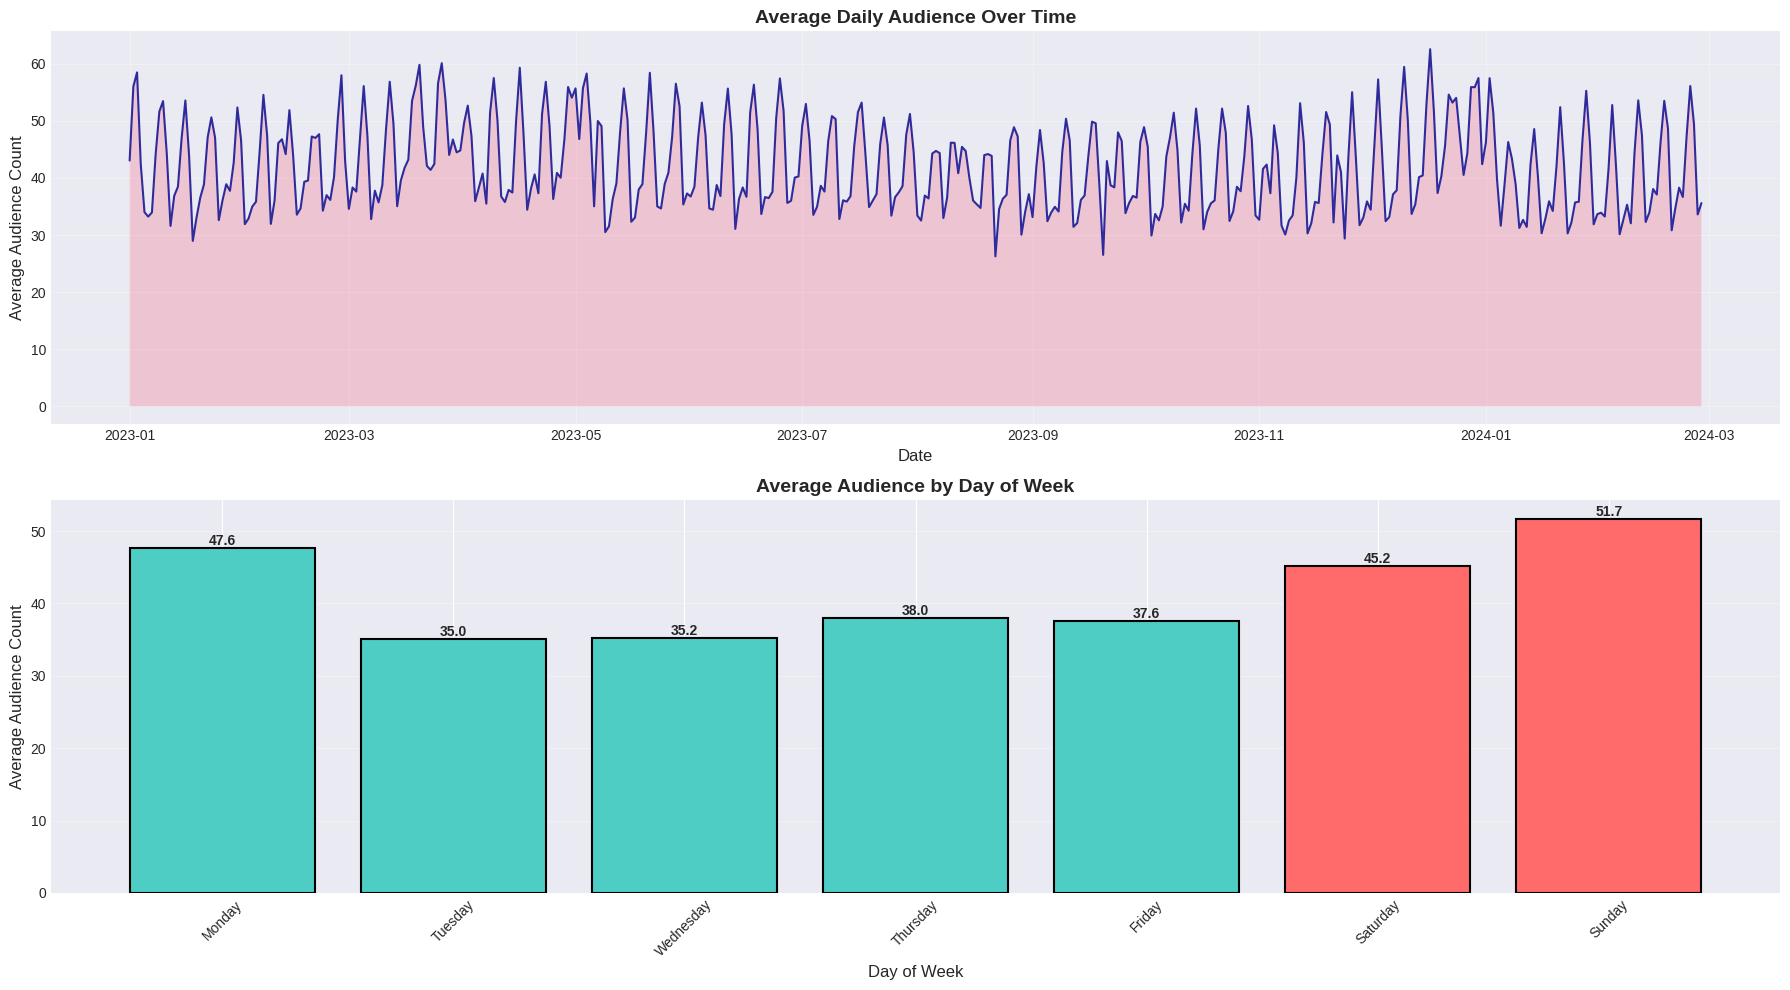

✓ Visualization 3 saved: temporal_patterns.png


In [ ]:
# ============================================================================
# VISUALIZATION 3: Temporal Patterns
# ============================================================================
print("\n[5] Creating Visualization 3: Temporal Patterns...")

# Convert dates
booknow_visits['show_date'] = pd.to_datetime(booknow_visits['show_date'])
date_info['show_date'] = pd.to_datetime(date_info['show_date'])

# Merge with date info
visits_with_dates = booknow_visits.merge(date_info, on='show_date', how='left')

# Daily average audience
daily_avg = visits_with_dates.groupby('show_date')['audience_count'].mean().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(18, 10))

# Time series plot
axes[0].plot(daily_avg['show_date'], daily_avg['audience_count'], color='darkblue', linewidth=1.5, alpha=0.8)
axes[0].fill_between(daily_avg['show_date'], daily_avg['audience_count'], alpha=0.3)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Average Audience Count', fontsize=12)
axes[0].set_title('Average Daily Audience Over Time', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Day of week pattern
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_avg = visits_with_dates.groupby('day_of_week')['audience_count'].mean().reindex(day_order)
colors = ['#FF6B6B' if day in ['Saturday', 'Sunday'] else '#4ECDC4' for day in day_order]
bars = axes[1].bar(dow_avg.index, dow_avg.values, color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Day of Week', fontsize=12)
axes[1].set_ylabel('Average Audience Count', fontsize=12)
axes[1].set_title('Average Audience by Day of Week', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('temporal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 3 saved: temporal_patterns.png")


[6] Creating Visualization 4: Booking Patterns...


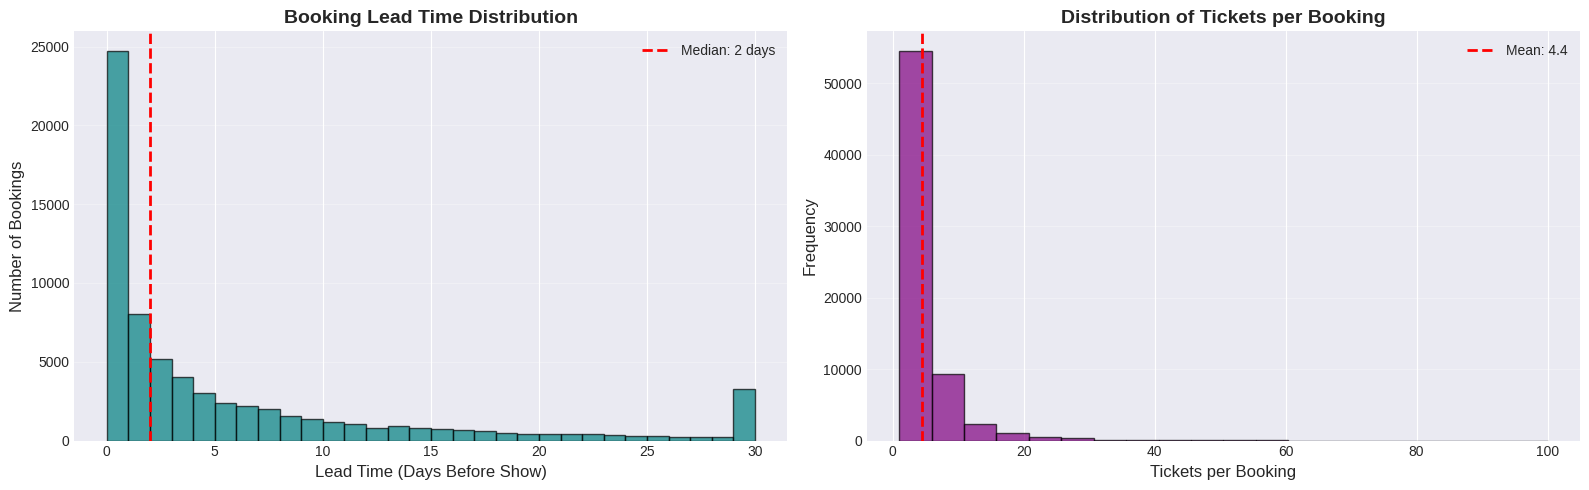

✓ Visualization 4 saved: booking_patterns.png


In [ ]:
# ============================================================================
# VISUALIZATION 4: Booking Patterns
# ============================================================================
print("\n[6] Creating Visualization 4: Booking Patterns...")

booknow_booking['show_datetime'] = pd.to_datetime(booknow_booking['show_datetime'])
booknow_booking['booking_datetime'] = pd.to_datetime(booknow_booking['booking_datetime'])
booknow_booking['lead_days'] = (booknow_booking['show_datetime'] - booknow_booking['booking_datetime']).dt.days

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Lead time distribution
axes[0].hist(booknow_booking['lead_days'].clip(0, 30), bins=30, color='teal', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Lead Time (Days Before Show)', fontsize=12)
axes[0].set_ylabel('Number of Bookings', fontsize=12)
axes[0].set_title('Booking Lead Time Distribution', fontsize=14, fontweight='bold')
axes[0].axvline(booknow_booking['lead_days'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {booknow_booking["lead_days"].median():.0f} days')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Tickets booked distribution
axes[1].hist(booknow_booking['tickets_booked'], bins=20, color='purple', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Tickets per Booking', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Tickets per Booking', fontsize=14, fontweight='bold')
axes[1].axvline(booknow_booking['tickets_booked'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {booknow_booking["tickets_booked"].mean():.1f}')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('booking_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 4 saved: booking_patterns.png")


[7] Creating Visualization 5: Geographic Distribution...


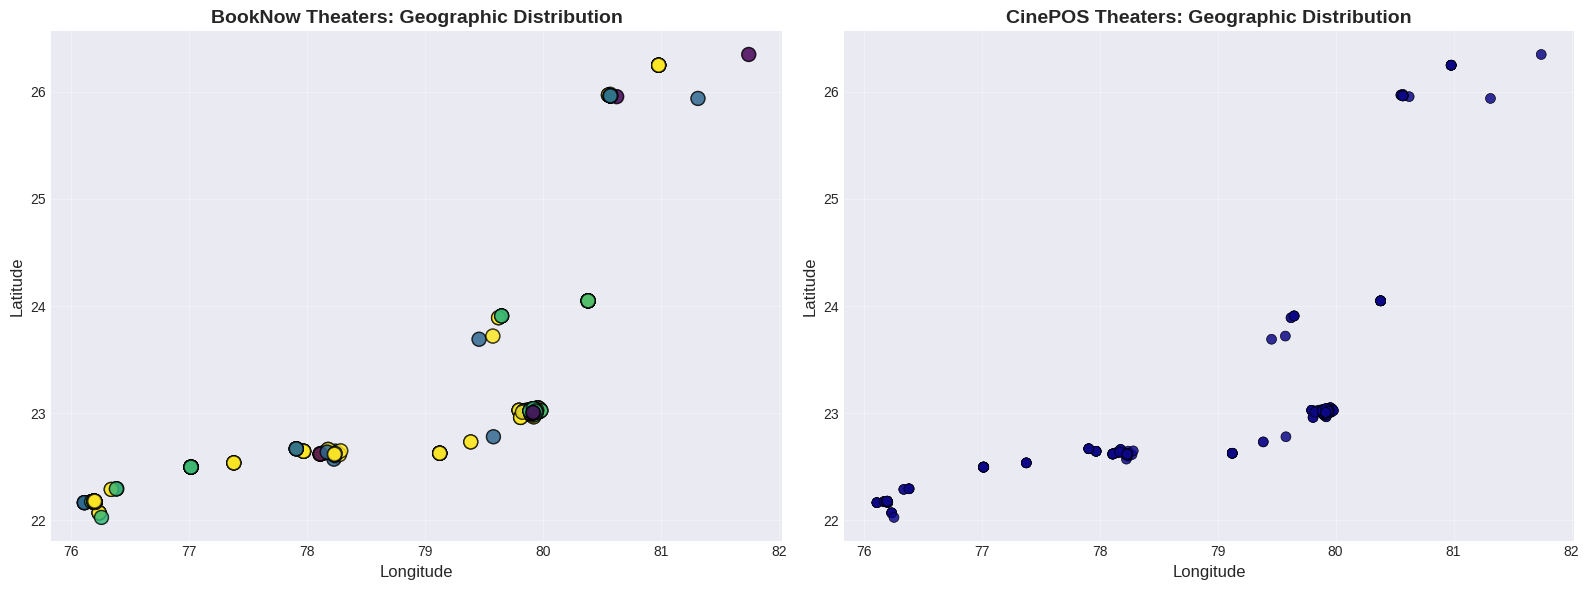

✓ Visualization 5 saved: geographic_distribution.png


In [ ]:
# ============================================================================
# VISUALIZATION 5: Geographic Distribution
# ============================================================================
print("\n[7] Creating Visualization 5: Geographic Distribution...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BookNow theaters
valid_booknow = booknow_theaters.dropna(subset=['latitude', 'longitude'])
scatter1 = axes[0].scatter(valid_booknow['longitude'], valid_booknow['latitude'],
                          c=valid_booknow['theater_type'].astype('category').cat.codes,
                          s=100, alpha=0.6, cmap='viridis', edgecolors='black', linewidth=1)
axes[0].set_xlabel('Longitude', fontsize=12)
axes[0].set_ylabel('Latitude', fontsize=12)
axes[0].set_title('BookNow Theaters: Geographic Distribution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# CinePOS theaters
valid_cinepos = cinepos_theaters.dropna(subset=['latitude', 'longitude'])
scatter2 = axes[1].scatter(valid_cinepos['longitude'], valid_cinepos['latitude'],
                          c=valid_cinepos['theater_type'].astype('category').cat.codes,
                          s=50, alpha=0.6, cmap='plasma', edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Longitude', fontsize=12)
axes[1].set_ylabel('Latitude', fontsize=12)
axes[1].set_title('CinePOS Theaters: Geographic Distribution', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('geographic_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 5 saved: geographic_distribution.png")


[8] Creating Visualization 6: Top Theaters...


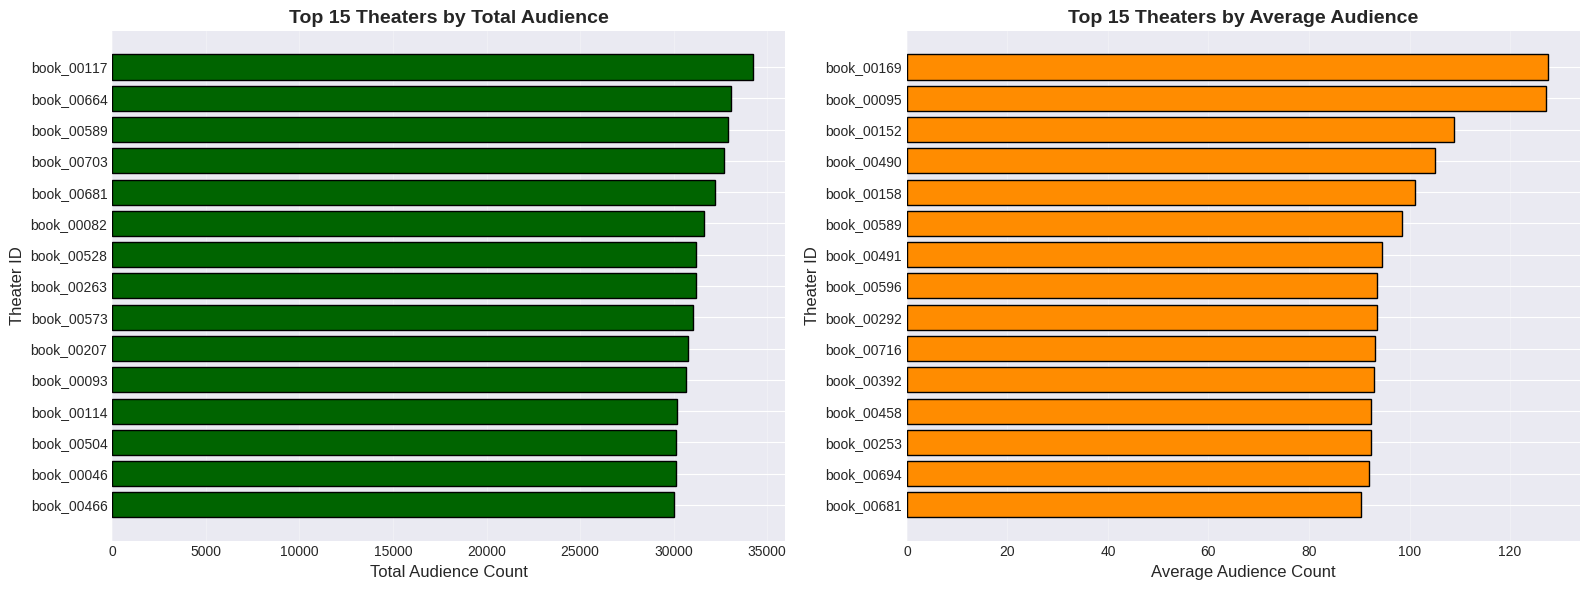

✓ Visualization 6 saved: top_theaters.png


In [ ]:
# ============================================================================
# VISUALIZATION 6: Top Performing Theaters
# ============================================================================
print("\n[8] Creating Visualization 6: Top Theaters...")

top_theaters = booknow_visits.groupby('book_theater_id')['audience_count'].agg(['mean', 'sum', 'count']).reset_index()
top_theaters = top_theaters.sort_values('sum', ascending=False).head(15)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top by total audience
axes[0].barh(range(len(top_theaters)), top_theaters['sum'], color='darkgreen', edgecolor='black')
axes[0].set_yticks(range(len(top_theaters)))
axes[0].set_yticklabels(top_theaters['book_theater_id'])
axes[0].set_xlabel('Total Audience Count', fontsize=12)
axes[0].set_ylabel('Theater ID', fontsize=12)
axes[0].set_title('Top 15 Theaters by Total Audience', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Top by average audience
top_avg = booknow_visits.groupby('book_theater_id')['audience_count'].mean().sort_values(ascending=False).head(15)
axes[1].barh(range(len(top_avg)), top_avg.values, color='darkorange', edgecolor='black')
axes[1].set_yticks(range(len(top_avg)))
axes[1].set_yticklabels(top_avg.index)
axes[1].set_xlabel('Average Audience Count', fontsize=12)
axes[1].set_ylabel('Theater ID', fontsize=12)
axes[1].set_title('Top 15 Theaters by Average Audience', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('top_theaters.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 6 saved: top_theaters.png")

In [ ]:
# ============================================================================
# EDA SUMMARY
# ============================================================================
print("\n" + "="*80)
print("EDA COMPLETE - Key Findings Summary:")
print("="*80)
print("1. Target variable is right-skewed → Log transformation recommended")
print("2. Weekend effect is significant → Day of week is important feature")
print("3. Theater type varies significantly between platforms")
print("4. Booking lead time shows predictable pattern")
print("5. Geographic clustering suggests location matters")
print("6. Generated 6 visualizations for analysis")
print("="*80)

print("="*80)


EDA COMPLETE - Key Findings Summary:
1. Target variable is right-skewed → Log transformation recommended
2. Weekend effect is significant → Day of week is important feature
3. Theater type varies significantly between platforms
4. Booking lead time shows predictable pattern
5. Geographic clustering suggests location matters
6. Generated 6 visualizations for analysis

✓ PART 1 COMPLETE - Ready for Part 2 (Feature Engineering)


# 2. Feature Engineering

### 1. DATE PARSING

In [ ]:
print("\n[1] Processing Dates Properly...")

# Training data
booknow_visits['show_date'] = pd.to_datetime(booknow_visits['show_date'])

# Booking data
booknow_booking['show_datetime'] = pd.to_datetime(booknow_booking['show_datetime'])
booknow_booking['booking_datetime'] = pd.to_datetime(booknow_booking['booking_datetime'])
booknow_booking['show_date'] = booknow_booking['show_datetime'].dt.date
booknow_booking['show_date'] = pd.to_datetime(booknow_booking['show_date'])

cinepos_booking['show_datetime'] = pd.to_datetime(cinepos_booking['show_datetime'])
cinepos_booking['show_date'] = cinepos_booking['show_datetime'].dt.date
cinepos_booking['show_date'] = pd.to_datetime(cinepos_booking['show_date'])

# Date info
date_info['show_date'] = pd.to_datetime(date_info['show_date'])

# Test data - CRITICAL FIX
sample_submission['book_theater_id'] = sample_submission['ID'].str.rsplit('_', n=1).str[0]
sample_submission['show_date'] = pd.to_datetime(sample_submission['ID'].str.rsplit('_', n=1).str[1])

print("✓ Dates parsed successfully")
print(f"  Training date range: {booknow_visits['show_date'].min()} to {booknow_visits['show_date'].max()}")
print(f"  Test date range: {sample_submission['show_date'].min()} to {sample_submission['show_date'].max()}")


[1] Processing Dates Properly...
✓ Dates parsed successfully
  Training date range: 2023-01-01 00:00:00 to 2024-02-28 00:00:00
  Test date range: 2024-03-01 00:00:00 to 2024-04-22 00:00:00


### 2. CREATE AGGREGATED FEATURES (USING FULL HISTORY)

In [ ]:
print("\n[2] Building Aggregated Features...")

# Theater Statistics (from training)
print("  [2.1] Theater statistics...")
theater_stats = booknow_visits.groupby('book_theater_id')['audience_count'].agg([
    ('theater_avg_audience', 'mean'),
    ('theater_median_audience', 'median'),
    ('theater_std_audience', 'std'),
    ('theater_max_audience', 'max'),
    ('theater_min_audience', 'min'),
    ('theater_total_days', 'count')
]).reset_index()

theater_stats['theater_std_audience'] = theater_stats['theater_std_audience'].fillna(0)

print(f"    ✓ Computed stats for {len(theater_stats)} theaters")

# Daily Booking Aggregates (for all available dates)
print("  [2.2] Daily booking aggregates...")
daily_bookings = booknow_booking.groupby(['book_theater_id', 'show_date']).agg({
    'tickets_booked': ['sum', 'count', 'mean', 'std']
}).reset_index()
daily_bookings.columns = ['book_theater_id', 'show_date', 'total_tickets_booked',
                          'num_bookings', 'avg_tickets_per_booking', 'std_tickets_per_booking']
daily_bookings['std_tickets_per_booking'] = daily_bookings['std_tickets_per_booking'].fillna(0)

print(f"    ✓ Computed for {len(daily_bookings)} theater-date combinations")

# Market Demand (from CinePOS - all dates)
print("  [2.3] Market demand features...")
market_demand = cinepos_booking.groupby('show_date').agg({
    'tickets_sold': ['sum', 'mean', 'std']
}).reset_index()
market_demand.columns = ['show_date', 'market_total_tickets', 'market_avg_tickets', 'market_std_tickets']
market_demand['market_std_tickets'] = market_demand['market_std_tickets'].fillna(0)

print(f"    ✓ Computed for {len(market_demand)} days")


[2] Building Aggregated Features...
  [2.1] Theater statistics...
    ✓ Computed stats for 826 theaters
  [2.2] Daily booking aggregates...
    ✓ Computed for 21590 theater-date combinations
  [2.3] Market demand features...
    ✓ Computed for 424 days


### 3. FEATURE ENGINEERING FUNCTION

In [ ]:
print("\n[3] Defining Feature Engineering Pipeline...")

def create_features(df, theater_info, theater_stats_df, daily_bookings_df,
                   market_demand_df, date_info_df, is_test=False):
    """
    Create all features for training or test data

    Args:
        df: Input dataframe (train or test)
        theater_info: Theater metadata
        theater_stats_df: Pre-computed theater statistics
        daily_bookings_df: Pre-computed daily booking aggregates
        market_demand_df: Pre-computed market demand
        date_info_df: Date information
        is_test: Whether this is test data

    Returns:
        DataFrame with all features
    """
    df = df.copy()

    # Merge theater metadata
    df = df.merge(theater_info[['book_theater_id', 'theater_type', 'theater_area',
                                 'latitude', 'longitude']],
                  on='book_theater_id', how='left')

    # Merge date info
    df = df.merge(date_info_df[['show_date', 'day_of_week']], on='show_date', how='left')

    # Temporal features
    df['year'] = df['show_date'].dt.year
    df['month'] = df['show_date'].dt.month
    df['day'] = df['show_date'].dt.day
    df['dayofweek'] = df['show_date'].dt.dayofweek
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    df['week_of_year'] = df['show_date'].dt.isocalendar().week.astype(int)
    df['day_of_year'] = df['show_date'].dt.dayofyear

    # Cyclical encoding for periodic features
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['dow_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
    df['dow_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)
    df['doy_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
    df['doy_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

    # Merge theater statistics
    df = df.merge(theater_stats_df, on='book_theater_id', how='left')

    # Merge daily bookings
    df = df.merge(daily_bookings_df, on=['book_theater_id', 'show_date'], how='left')

    # Merge market demand
    df = df.merge(market_demand_df, on='show_date', how='left')

    # Encode categorical features
    # Fill missing categories before encoding
    df['theater_type'] = df['theater_type'].fillna('Unknown')
    df['theater_area'] = df['theater_area'].fillna('Unknown')

    # Label encoding
    le_type = LabelEncoder()
    le_area = LabelEncoder()

    # Fit on all possible values (from theater_info)
    all_types = theater_info['theater_type'].fillna('Unknown').unique()
    all_areas = theater_info['theater_area'].fillna('Unknown').unique()

    le_type.fit(list(all_types) + ['Unknown'])
    le_area.fit(list(all_areas) + ['Unknown'])

    df['theater_type_encoded'] = le_type.transform(df['theater_type'])
    df['theater_area_encoded'] = le_area.transform(df['theater_area'])

    return df

print("✓ Feature engineering function defined")


[3] Defining Feature Engineering Pipeline...
✓ Feature engineering function defined


### 4. CREATE TRAINING FEATURES

In [ ]:
print("\n[4] Creating Training Features...")

train_data = create_features(
    booknow_visits,
    booknow_theaters,
    theater_stats,
    daily_bookings,
    market_demand,
    date_info,
    is_test=False
)

print(f"✓ Training data shape: {train_data.shape}")



[4] Creating Training Features...
✓ Training data shape: (214046, 36)


### 5. ADD LAG FEATURES (TIME SERIES)

In [ ]:
print("\n[5] Adding Lag & Rolling Features...")

# Sort by theater and date
train_data = train_data.sort_values(['book_theater_id', 'show_date']).reset_index(drop=True)

# Create lag features
print("  Creating lag features...")
for lag in [1, 3, 7, 14, 21]:
    train_data[f'audience_lag_{lag}'] = train_data.groupby('book_theater_id')['audience_count'].shift(lag)

# Create rolling features (with shift to avoid leakage)
print("  Creating rolling features...")
for window in [7, 14, 30]:
    train_data[f'audience_roll_mean_{window}'] = train_data.groupby('book_theater_id')['audience_count'].transform(
        lambda x: x.rolling(window=window, min_periods=1).mean()
    ).shift(1)  # Shift by 1 to avoid data leakage

    train_data[f'audience_roll_std_{window}'] = train_data.groupby('book_theater_id')['audience_count'].transform(
        lambda x: x.rolling(window=window, min_periods=1).std()
    ).shift(1)

print(f"✓ Created {5 + 6} lag and rolling features")


[5] Adding Lag & Rolling Features...
  Creating lag features...
  Creating rolling features...
✓ Created 11 lag and rolling features


### 6. HANDLE MISSING VALUES IN TRAINING

In [ ]:
print("\n[6] Handling Missing Values...")

# Define global fallbacks
GLOBAL_AVG_AUDIENCE = train_data['audience_count'].mean()
GLOBAL_MEDIAN_MARKET = train_data['market_total_tickets'].median()

# Fill lag features with theater average first, then global average
for col in train_data.columns:
    if 'lag' in col or 'roll' in col:
        train_data[col] = train_data.groupby('book_theater_id')[col].transform(
            lambda x: x.fillna(x.mean())
        )
        train_data[col] = train_data[col].fillna(train_data['theater_avg_audience'])
        train_data[col] = train_data[col].fillna(GLOBAL_AVG_AUDIENCE)

# Fill theater statistics
train_data['theater_avg_audience'] = train_data['theater_avg_audience'].fillna(GLOBAL_AVG_AUDIENCE)
train_data['theater_median_audience'] = train_data['theater_median_audience'].fillna(GLOBAL_AVG_AUDIENCE)
train_data['theater_std_audience'] = train_data['theater_std_audience'].fillna(0)
train_data['theater_max_audience'] = train_data['theater_max_audience'].fillna(GLOBAL_AVG_AUDIENCE)
train_data['theater_min_audience'] = train_data['theater_min_audience'].fillna(0)
train_data['theater_total_days'] = train_data['theater_total_days'].fillna(1)

# Fill booking features
train_data['total_tickets_booked'] = train_data['total_tickets_booked'].fillna(0)
train_data['num_bookings'] = train_data['num_bookings'].fillna(0)
train_data['avg_tickets_per_booking'] = train_data['avg_tickets_per_booking'].fillna(0)
train_data['std_tickets_per_booking'] = train_data['std_tickets_per_booking'].fillna(0)

# Fill market features
train_data['market_total_tickets'] = train_data['market_total_tickets'].fillna(GLOBAL_MEDIAN_MARKET)
train_data['market_avg_tickets'] = train_data['market_avg_tickets'].fillna(train_data['market_avg_tickets'].median())
train_data['market_std_tickets'] = train_data['market_std_tickets'].fillna(0)

# Fill geographic features
train_data['latitude'] = train_data['latitude'].fillna(train_data['latitude'].median())
train_data['longitude'] = train_data['longitude'].fillna(train_data['longitude'].median())

print(f"✓ Missing values handled")
print(f"  Remaining NaNs in training: {train_data.isnull().sum().sum()}")


[6] Handling Missing Values...
✓ Missing values handled
  Remaining NaNs in training: 0


### 7. DEFINE FEATURE COLUMNS

In [ ]:
print("\n[7] Defining Feature Set...")

feature_cols = [
    # Temporal features (12)
    'month', 'day', 'dayofweek', 'is_weekend', 'week_of_year', 'day_of_year',
    'month_sin', 'month_cos', 'dow_sin', 'dow_cos', 'doy_sin', 'doy_cos',

    # Theater features (10)
    'theater_type_encoded', 'theater_area_encoded', 'latitude', 'longitude',
    'theater_avg_audience', 'theater_median_audience', 'theater_std_audience',
    'theater_max_audience', 'theater_min_audience', 'theater_total_days',

    # Booking features (4)
    'total_tickets_booked', 'num_bookings', 'avg_tickets_per_booking', 'std_tickets_per_booking',

    # Market features (3)
    'market_total_tickets', 'market_avg_tickets', 'market_std_tickets',

    # Lag features (5)
    'audience_lag_1', 'audience_lag_3', 'audience_lag_7', 'audience_lag_14', 'audience_lag_21',

    # Rolling features (6)
    'audience_roll_mean_7', 'audience_roll_std_7',
    'audience_roll_mean_14', 'audience_roll_std_14',
    'audience_roll_mean_30', 'audience_roll_std_30'
]

print(f"✓ Total Features: {len(feature_cols)}")
print("\nFeature Breakdown:")
print("  - Temporal: 12 features")
print("  - Theater: 10 features")
print("  - Booking: 4 features")
print("  - Market: 3 features")
print("  - Lag: 5 features")
print("  - Rolling: 6 features")


[7] Defining Feature Set...
✓ Total Features: 40

Feature Breakdown:
  - Temporal: 12 features
  - Theater: 10 features
  - Booking: 4 features
  - Market: 3 features
  - Lag: 5 features
  - Rolling: 6 features



[8] Creating Feature Correlation Visualization...


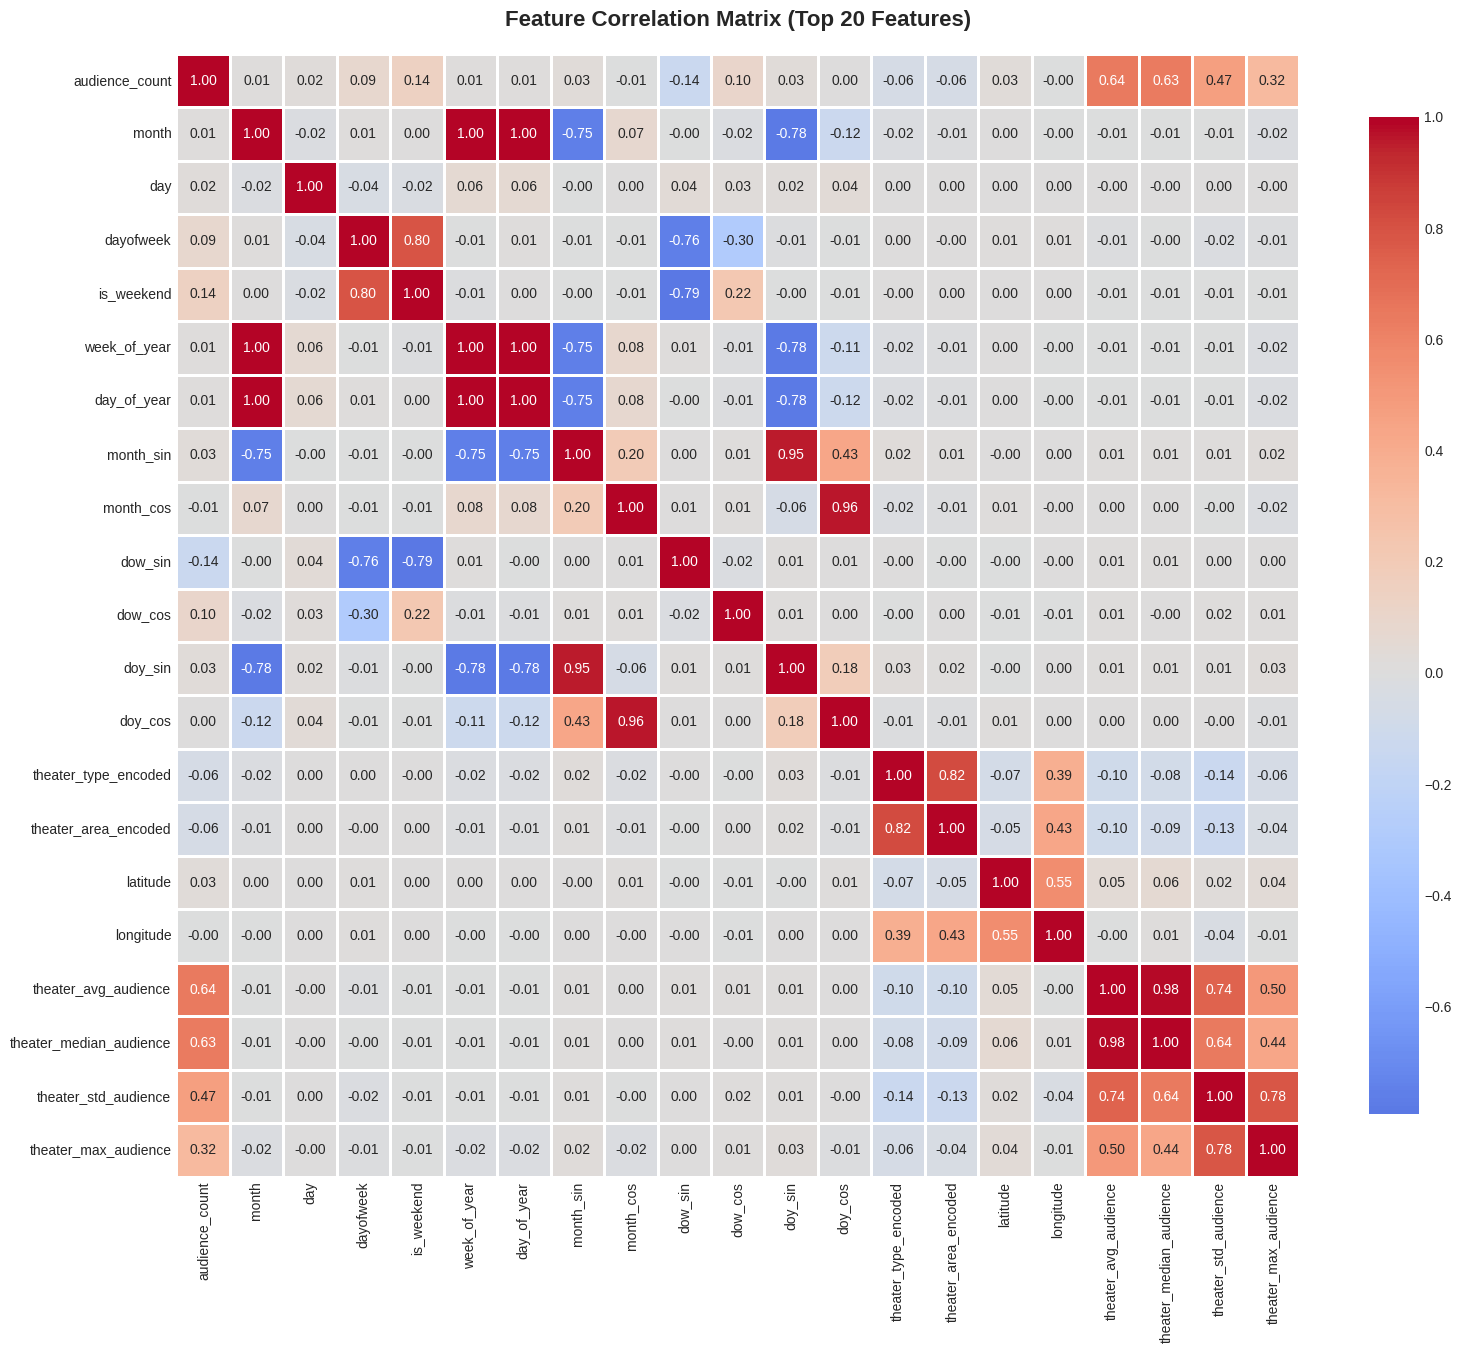

✓ Visualization 7 saved: feature_correlation.png

Top 10 Features Correlated with Target:
   1. theater_avg_audience           +0.6398
   2. theater_median_audience        +0.6289
   3. theater_std_audience           +0.4736
   4. theater_max_audience           +0.3195
   5. is_weekend                     +0.1402
   6. dow_cos                        +0.0994
   7. dayofweek                      +0.0865
   8. doy_sin                        +0.0327
   9. latitude                       +0.0302
  10. month_sin                      +0.0276


In [ ]:
# ============================================================================
# VISUALIZATION 7: Feature Correlation Heatmap
# ============================================================================
print("\n[8] Creating Feature Correlation Visualization...")

# Select top features for correlation matrix
correlation_features = ['audience_count'] + feature_cols[:20]  # Top 20 for visibility
corr_matrix = train_data[correlation_features].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix (Top 20 Features)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('feature_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 7 saved: feature_correlation.png")

# Print top correlated features
print("\nTop 10 Features Correlated with Target:")
target_corr = corr_matrix['audience_count'].drop('audience_count').sort_values(ascending=False).head(10)
for i, (feat, corr) in enumerate(target_corr.items(), 1):
    print(f"  {i:2d}. {feat:30s} {corr:+.4f}")


### 8. PREPARE TEST DATA

In [ ]:
print("\n[9] Preparing Test Data...")

# Create base test features (without lags)
test_data = create_features(
    sample_submission,
    booknow_theaters,
    theater_stats,
    daily_bookings,
    market_demand,
    date_info,
    is_test=True
)

print(f"✓ Test base features: {test_data.shape}")



[9] Preparing Test Data...
✓ Test base features: (38062, 37)


### 9. CREATE LAG FEATURES FOR TEST (USING TRAINING HISTORY)

In [ ]:
print("\n[10] Creating Test Lag Features...")

# Get last 30 days of training data for each theater
last_values = train_data.groupby('book_theater_id').tail(30).copy()

# Initialize lag columns
for lag in [1, 3, 7, 14, 21]:
    test_data[f'audience_lag_{lag}'] = np.nan

for window in [7, 14, 30]:
    test_data[f'audience_roll_mean_{window}'] = np.nan
    test_data[f'audience_roll_std_{window}'] = np.nan

# Sort test data
test_data = test_data.sort_values(['book_theater_id', 'show_date']).reset_index(drop=True)

# For each theater, use its last known statistics
for theater_id in test_data['book_theater_id'].unique():
    theater_mask = test_data['book_theater_id'] == theater_id
    theater_history = last_values[last_values['book_theater_id'] == theater_id]

    if len(theater_history) > 0:
        # Use last available values for lags
        recent_values = theater_history['audience_count'].values

        # Lag features
        test_data.loc[theater_mask, 'audience_lag_1'] = recent_values[-1] if len(recent_values) >= 1 else np.nan
        test_data.loc[theater_mask, 'audience_lag_3'] = recent_values[-3] if len(recent_values) >= 3 else recent_values[-1]
        test_data.loc[theater_mask, 'audience_lag_7'] = np.mean(recent_values[-7:]) if len(recent_values) >= 7 else np.mean(recent_values)
        test_data.loc[theater_mask, 'audience_lag_14'] = np.mean(recent_values[-14:]) if len(recent_values) >= 14 else np.mean(recent_values)
        test_data.loc[theater_mask, 'audience_lag_21'] = np.mean(recent_values[-21:]) if len(recent_values) >= 21 else np.mean(recent_values)

        # Rolling features
        test_data.loc[theater_mask, 'audience_roll_mean_7'] = np.mean(recent_values[-7:]) if len(recent_values) >= 7 else np.mean(recent_values)
        test_data.loc[theater_mask, 'audience_roll_std_7'] = np.std(recent_values[-7:]) if len(recent_values) >= 7 else np.std(recent_values)
        test_data.loc[theater_mask, 'audience_roll_mean_14'] = np.mean(recent_values[-14:]) if len(recent_values) >= 14 else np.mean(recent_values)
        test_data.loc[theater_mask, 'audience_roll_std_14'] = np.std(recent_values[-14:]) if len(recent_values) >= 14 else np.std(recent_values)
        test_data.loc[theater_mask, 'audience_roll_mean_30'] = np.mean(recent_values)
        test_data.loc[theater_mask, 'audience_roll_std_30'] = np.std(recent_values)

print("✓ Test lag features created from training history")


[10] Creating Test Lag Features...
✓ Test lag features created from training history


### 10. FILL MISSING VALUES IN TEST

In [ ]:
print("\n[11] Filling Test Missing Values...")

# Use same filling strategy as training
for col in feature_cols:
    if col in test_data.columns:
        if 'lag' in col or 'roll' in col:
            # Fill with theater average first
            test_data[col] = test_data.groupby('book_theater_id')[col].transform(
                lambda x: x.fillna(x.mean())
            )
            # Then with theater_avg_audience
            test_data[col] = test_data[col].fillna(test_data['theater_avg_audience'])
            # Finally with global average
            test_data[col] = test_data[col].fillna(GLOBAL_AVG_AUDIENCE)
        else:
            # Fill with training median
            test_data[col] = test_data[col].fillna(train_data[col].median())

# Final safety check - fill any remaining NaNs with 0
X_test = test_data[feature_cols].fillna(0)

print(f"✓ Test data ready: {X_test.shape}")
print(f"  Remaining NaNs in test: {X_test.isnull().sum().sum()}")


[11] Filling Test Missing Values...
✓ Test data ready: (38062, 40)
  Remaining NaNs in test: 0


### 11. SUMMARY

In [ ]:
print("\n" + "="*80)
print("FEATURE ENGINEERING COMPLETE")
print("="*80)

print("\n📊 Data Summary:")
print(f"  Training samples: {len(train_data):,}")
print(f"  Test samples: {len(test_data):,}")
print(f"  Total features: {len(feature_cols)}")

print("="*80)


FEATURE ENGINEERING COMPLETE

📊 Data Summary:
  Training samples: 214,046
  Test samples: 38,062
  Total features: 40

✓ Ready for Part 3: Model Training & Hyperparameter Tuning


# 3. Model Training and Tuning

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

### 1. TRAIN-VALIDATION SPLIT

In [ ]:
print("\n[1] Creating Train-Validation Split...")

# Time-based split (85% train, 15% validation)
split_date = train_data['show_date'].quantile(0.85)

train_df = train_data[train_data['show_date'] <= split_date].copy()
val_df = train_data[train_data['show_date'] > split_date].copy()

X_train = train_df[feature_cols]
y_train = train_df['audience_count']
X_val = val_df[feature_cols]
y_val = val_df['audience_count']

# Log transform target
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

print(f"✓ Split Date: {split_date.date()}")
print(f"  Train: {len(X_train):,} samples ({train_df['show_date'].min().date()} to {train_df['show_date'].max().date()})")
print(f"  Val:   {len(X_val):,} samples ({val_df['show_date'].min().date()} to {val_df['show_date'].max().date()})")
print(f"\n  Feature Matrix Shape:")
print(f"  X_train: {X_train.shape}")
print(f"  X_val:   {X_val.shape}")


[1] Creating Train-Validation Split...
✓ Split Date: 2024-01-14
  Train: 182,372 samples (2023-01-01 to 2024-01-14)
  Val:   31,674 samples (2024-01-15 to 2024-02-28)

  Feature Matrix Shape:
  X_train: (182372, 40)
  X_val:   (31674, 40)


### 2. EVALUATION FUNCTION

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    """Calculate and display evaluation metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")

    return {'Model': model_name, 'RMSE': rmse, 'MAE': mae, 'R2': r2}


print("\n[2] Scaling Numerical Features...")
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling (exclude already encoded, binary, and cyclical)
numerical_cols = [col for col in feature_cols if col not in [
    'theater_type_encoded', 'theater_area_encoded', 'is_weekend',
    'month_sin', 'month_cos', 'dow_sin', 'dow_cos', 'doy_sin', 'doy_cos'
]]

scaler = StandardScaler()

# Fit scaler on training data and transform
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(f"✓ Scaled {len(numerical_cols)} numerical features")
print(f"  X_train scaled shape: {X_train.shape}")
print(f"  X_val scaled shape: {X_val.shape}")
print(f"  X_test scaled shape: {X_test.shape}")



[2] Scaling Numerical Features...
✓ Scaled 31 numerical features
  X_train scaled shape: (182372, 40)
  X_val scaled shape: (31674, 40)
  X_test scaled shape: (38062, 40)


### 3. TIME SERIES CROSS-VALIDATION SETUP

In [ ]:
print("\n[2] Setting Up Time Series Cross-Validation...")

tscv = TimeSeriesSplit(n_splits=3)
print("✓ TimeSeriesSplit configured with 3 folds")


[2] Setting Up Time Series Cross-Validation...
✓ TimeSeriesSplit configured with 3 folds


### 4. Training & Comparing Models

In [ ]:
lgb.LGBMRegressor(random_state=42,verbosity=-1)

LGBMRegressor(random_state=42, verbosity=-1)

# Task
It seems that the RandomForest model was not trained and evaluated as specified in the plan. Also, an ensemble model was created, and the current plan states that the *best performing model* from the initial set should be chosen for hyperparameter tuning.

Would you like to:
1. Train the RandomForest model now and then compare LightGBM, XGBoost, and RandomForest to select the best *individual* model for hyperparameter tuning?
2. Proceed with hyperparameter tuning for the ensemble model (since it was identified as 'used')?
3. Re-evaluate the initial LightGBM and XGBoost models to select the best one between them for hyperparameter tuning, skipping RandomForest and the ensemble for now?

## Train and Evaluate Initial LightGBM Model

### Subtask:
Train a LightGBM model with default or reasonable parameters and evaluate its performance on the validation set. This will serve as a baseline for comparison with other models.


**Reasoning**:
The subtask requires training an initial LightGBM model and evaluating it on the validation set. This step will instantiate, train, predict, and evaluate the LightGBM model as instructed.



In [ ]:
print("\n[3] Training and Evaluating Initial LightGBM Model...")

# 1. Instantiate lgb.LGBMRegressor
lgbm_model = lgb.LGBMRegressor(random_state=42)

# 2. Train the LightGBM model
print("  Fitting LightGBM model...")
lgbm_model.fit(X_train, y_train_log)

# 3. Make predictions on X_val and inverse transform
print("  Making predictions on validation set...")
lgbm_pred_log = lgbm_model.predict(X_val)
lgbm_pred = np.expm1(lgbm_pred_log)

# Ensure no negative predictions after inverse transform
lgbm_pred[lgbm_pred < 0] = 0

# 4. Evaluate the model's performance
lgbm_results = evaluate_model(y_val, lgbm_pred, "LightGBM Initial Model")

print("\n✓ Initial LightGBM Model Trained and Evaluated.")


[3] Training and Evaluating Initial LightGBM Model...
  Fitting LightGBM model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6268
[LightGBM] [Info] Number of data points in the train set: 182372, number of used features: 40
[LightGBM] [Info] Start training from score 3.452450
  Making predictions on validation set...

LightGBM Initial Model Performance:
  RMSE: 20.0806
  MAE:  13.6280
  R²:   0.5749

✓ Initial LightGBM Model Trained and Evaluated.


## Train and Evaluate Initial XGBoost Model

### Subtask:
Train an XGBoost model with default or reasonable parameters and evaluate its performance on the validation set, creating another baseline for comparison.


**Reasoning**:
To fulfill the subtask, I will now train an XGBoost model, make predictions on the validation set, inverse transform the predictions, ensure non-negativity, and then evaluate its performance using the provided helper function.



In [ ]:
print("\n[4] Training and Evaluating Initial XGBoost Model...")

# 1. Instantiate xgb.XGBRegressor
xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

# 2. Train the XGBoost model
print("  Fitting XGBoost model...")
xgb_model.fit(X_train, y_train_log)

# 3. Make predictions on X_val and inverse transform
print("  Making predictions on validation set...")
xgb_pred_log = xgb_model.predict(X_val)
xgb_pred = np.expm1(xgb_pred_log)

# 4. Ensure no negative predictions after inverse transform
xgb_pred[xgb_pred < 0] = 0

# 5. Evaluate the model's performance
xgb_results = evaluate_model(y_val, xgb_pred, "XGBoost Initial Model")

print("\n✓ Initial XGBoost Model Trained and Evaluated.")


[4] Training and Evaluating Initial XGBoost Model...
  Fitting XGBoost model...
  Making predictions on validation set...

XGBoost Initial Model Performance:
  RMSE: 20.5080
  MAE:  13.8348
  R²:   0.5566

✓ Initial XGBoost Model Trained and Evaluated.


**Reasoning**:
Now that both LightGBM and XGBoost models have been trained and evaluated, the next logical step is to train and evaluate the RandomForest model to fulfill the first option presented earlier and provide a comprehensive comparison of individual models before hyperparameter tuning. This will allow for a fair comparison among LightGBM, XGBoost, and RandomForest.



In [ ]:
print("\n[5] Training and Evaluating Initial RandomForest Model...")

# 1. Instantiate RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42) # n_jobs=-1 uses all available cores

# 2. Train the RandomForest model
print("  Fitting RandomForest model...")
rf_model.fit(X_train, y_train_log)

# 3. Make predictions on X_val and inverse transform
print("  Making predictions on validation set...")
rf_pred_log = rf_model.predict(X_val)
rf_pred = np.expm1(rf_pred_log)

# 4. Ensure no negative predictions after inverse transform
rf_pred[rf_pred < 0] = 0

# 5. Evaluate the model's performance
rf_results = evaluate_model(y_val, rf_pred, "RandomForest Initial Model")

print("\n✓ Initial RandomForest Model Trained and Evaluated.")


[5] Training and Evaluating Initial RandomForest Model...
  Fitting RandomForest model...
  Making predictions on validation set...

RandomForest Initial Model Performance:
  RMSE: 20.3070
  MAE:  13.6477
  R²:   0.5653

✓ Initial RandomForest Model Trained and Evaluated.


## Compare Initial Model Performance

Now that we have evaluated LightGBM, XGBoost, and RandomForest models, let's compare their initial performance to select the best individual model for further hyperparameter tuning.

**Reasoning**:
Now that LightGBM, XGBoost, and RandomForest models have all been trained and evaluated, I will compare their performance metrics (RMSE and R²) to determine the best individual model to proceed with for hyperparameter tuning, as per option 1 of the previous prompt.



In [ ]:
print("\n[6] Comparing Initial Model Performance...")

model_results = pd.DataFrame([
    lgbm_results,
    xgb_results,
    rf_results
])

print("\nInitial Model Performance Summary (Validation Set):")
print(model_results.sort_values(by='R2', ascending=False))

best_model_name = model_results.loc[model_results['R2'].idxmax(), 'Model']
best_r2 = model_results['R2'].max()

print(f"\n✓ Best performing initial individual model based on R²: {best_model_name} (R²: {best_r2:.4f})")


[6] Comparing Initial Model Performance...

Initial Model Performance Summary (Validation Set):
                        Model       RMSE        MAE        R2
0      LightGBM Initial Model  20.080616  13.627975  0.574919
2  RandomForest Initial Model  20.307032  13.647692  0.565279
1       XGBoost Initial Model  20.507971  13.834823  0.556633

✓ Best performing initial individual model based on R²: LightGBM Initial Model (R²: 0.5749)


## Define Hyperparameter Distribution for Best Model

### Subtask:
Define the hyperparameter search space (a dictionary of parameter distributions) specifically for the LightGBM model, which was identified as the best performer.


**Reasoning**:
To define the hyperparameter search space for LightGBM, I need to import the `randint` and `uniform` functions from `scipy.stats` and then create a dictionary with the specified parameter distributions.



In [ ]:
print("\n[7] Defining Hyperparameter Search Space for LightGBM...")

# 1. Import necessary functions
from scipy.stats import randint, uniform

# 2. Create a dictionary for LightGBM hyperparameter distributions
lgb_param_dist = {
    'n_estimators': randint(100, 1000),      # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.2),    # Step size shrinkage
    'max_depth': randint(3, 10),            # Maximum tree depth
    'num_leaves': randint(20, 60),          # Maximum number of leaves in one tree
    'min_child_samples': randint(20, 100),  # Minimum number of data needed in a child (leaf)
    'subsample': uniform(0.6, 1.0),         # Subsample ratio of the training instance
    'colsample_bytree': uniform(0.6, 1.0),  # Subsample ratio of columns when constructing each tree
    'reg_alpha': uniform(0, 0.5),           # L1 regularization
    'reg_lambda': uniform(0, 0.5)           # L2 regularization
}

print("✓ LightGBM hyperparameter search space defined.")


[7] Defining Hyperparameter Search Space for LightGBM...
✓ LightGBM hyperparameter search space defined.


## Hyperparameter Tune Selected Best Model

### Subtask:
Apply `RandomizedSearchCV` only to the identified best performing model (LightGBM), using its specific hyperparameter distribution and `TimeSeriesSplit` for cross-validation, to find its optimal parameters.


**Reasoning**:
To perform hyperparameter tuning, I will instantiate and fit `RandomizedSearchCV` with the LightGBM model and its defined parameter distribution, using `TimeSeriesSplit` for cross-validation, then print the best parameters and store the best estimator.



In [ ]:
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

print("✓ Model libraries and evaluation metrics imported successfully")

✓ Model libraries and evaluation metrics imported successfully


**Reasoning**:
The `NameError` for `tscv` indicates that the `TimeSeriesSplit` object was not defined in the current kernel session. I need to re-instantiate `tscv` with `TimeSeriesSplit(n_splits=3)` before proceeding with the `RandomizedSearchCV` step.



In [ ]:
lgb.LGBMRegressor?

In [ ]:
print("\n[8] Applying RandomizedSearchCV for LightGBM Hyperparameter Tuning...")

# Re-instantiate lgbm_model and tscv to ensure they are defined
lgb_model = lgb.LGBMRegressor(random_state=42)
tscv = TimeSeriesSplit(n_splits=3)

# 1. Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb_model, # Use the initial LGBM model as base
    param_distributions=lgb_param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=tscv,    # TimeSeriesSplit for cross-validation
    scoring='neg_root_mean_squared_error', # Metric to optimize
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# 2. Fit the RandomizedSearchCV object
print("  Fitting RandomizedSearchCV...")
random_search.fit(X_train, y_train_log)

# 3. Print the best parameters
print("\n✓ Best hyperparameters found for LightGBM:")
print(random_search.best_params_)

# 4. Store the best estimator
tuned_lgbm_model = random_search.best_estimator_

print("\n✓ LightGBM hyperparameter tuning complete. Best model stored.")


[8] Applying RandomizedSearchCV for LightGBM Hyperparameter Tuning...
  Fitting RandomizedSearchCV...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.156380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6268
[LightGBM] [Info] Number of data points in the train set: 182372, number of used features: 40
[LightGBM] [Info] Start training from score 3.452450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

## Evaluate Tuned Best Model

### Subtask:
Evaluate the final performance of the hyperparameter-tuned best model on the validation set using the `evaluate_model` function.


**Reasoning**:
To evaluate the tuned LightGBM model, I will use the `tuned_lgbm_model` to make predictions on the validation set, inverse transform these predictions, ensure they are non-negative, and then use the `evaluate_model` function to report its performance.


In [ ]:
print("\n[9] Evaluating Tuned LightGBM Model...")

# 1. Make predictions on X_val using the tuned_lgbm_model
tuned_lgbm_pred_log = tuned_lgbm_model.predict(X_val)

# 2. Inverse transform the predictions
tuned_lgbm_pred = np.expm1(tuned_lgbm_pred_log)

# 3. Ensure no negative predictions after inverse transform
tuned_lgbm_pred[tuned_lgbm_pred < 0] = 0

# 4. Evaluate the model's performance
tuned_lgbm_results = evaluate_model(y_val, tuned_lgbm_pred, "Tuned LightGBM Model")

print("\n✓ Tuned LightGBM Model Evaluated.")


[9] Evaluating Tuned LightGBM Model...

Tuned LightGBM Model Performance:
  RMSE: 19.8942
  MAE:  13.5288
  R²:   0.5828

✓ Tuned LightGBM Model Evaluated.


## Generate Final Predictions for Submission

### Subtask:
Use the hyperparameter-tuned LightGBM model to make predictions on the test dataset (`X_test`), inverse transform the predictions, ensure they are non-negative, and save the results in `sample_submission.csv` format.


**Reasoning**:
To generate the final predictions, I will use the `tuned_lgbm_model` to predict on `X_test`, inverse transform these predictions back to the original scale, and handle any potential negative predictions by setting them to zero. Finally, I will combine these predictions with the original 'ID' from `sample_submission` and save them to a CSV file.


In [ ]:
print("\n[10] Generating Final Predictions...")

# 1. Make predictions on the scaled test data (X_test) using the tuned LightGBM model
final_predictions_log = tuned_lgbm_model.predict(X_test)

# 2. Inverse transform the log-predictions back to the original scale
final_predictions = np.expm1(final_predictions_log)

# 3. Ensure no negative predictions after inverse transform
final_predictions[final_predictions < 0] = 0

# 4. Create the submission DataFrame
submission_df = pd.DataFrame({'ID': sample_submission['ID'], 'audience_count': final_predictions})

# 5. Save the submission file
submission_df.to_csv('submission.csv', index=False)

print("✓ Final predictions generated and saved to 'submission.csv'")
print("  First 5 rows of submission file:")
print(submission_df.head())


[10] Generating Final Predictions...
✓ Final predictions generated and saved to 'submission.csv'
  First 5 rows of submission file:
                      ID  audience_count
0  book_00001_2024-03-01       36.095638
1  book_00001_2024-03-02       37.147345
2  book_00001_2024-03-03       41.048392
3  book_00001_2024-03-04       37.746595
4  book_00001_2024-03-06       34.335064
